In [14]:
import pandas as pd
import numpy as np

train = pd.read_csv('./data/train.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

x = train.drop(['label'], axis=1)

y = train['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1001)

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score, roc_curve
accuracy_score(y_test, y_pred)

0.93559523809523815

In [18]:
y_pred[:10]

array([3, 9, 3, 1, 0, 8, 2, 9, 0, 0])

In [19]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm  

cfm = confusion_matrix(y_test, y_pred)

cfm

array([[809,   0,   2,   3,   2,   4,   3,   0,   4,   1],
       [  0, 907,   4,   3,   3,   2,   1,   1,   2,   1],
       [  7,   9, 806,   9,   5,   2,   3,   7,   4,   3],
       [  4,   1,  19, 779,   0,  16,   2,   9,  10,   5],
       [  4,   4,   2,   0, 774,   1,   4,   1,   2,  16],
       [ 14,   1,   6,  32,   6, 708,  11,   0,  11,   5],
       [ 11,   3,   4,   0,   5,  12, 760,   0,   1,   0],
       [  0,   9,  20,  10,  14,   1,   0, 841,   3,  12],
       [  3,  15,  13,  21,   6,  20,   5,   2, 737,  10],
       [  2,   2,   8,  10,  17,   6,   0,  14,  11, 738]])

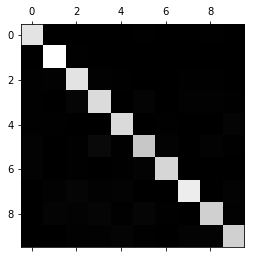

In [20]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

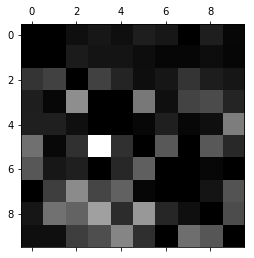

In [21]:
row_sums = cfm.sum(axis=1, keepdims=True)
norm_conf_mx = cfm / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [22]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(model, x_train, y_train, cv=3,
                                    method="predict_proba")

y_probas_forest

array([[ 0. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0.9, ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [25]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

NameError: name 'fpr' is not defined

In [26]:
test = pd.read_csv('./data/test.csv')

test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test_pred = model.predict(test)

In [28]:
sub = pd.DataFrame({'Label': test_pred})

sub['ImageId'] = sub.index + 1

sub.head()

,Label,ImageId
0,2,1
1,0,2
2,9,3
3,4,4
4,3,5


In [ ]:
sub.to_csv('./data/sub.csv', index=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x, y)

In [ ]:
knn_pred = knn.predict(test)

In [ ]:
sub = pd.DataFrame({'Label': knn_pred})

sub['ImageId'] = sub.index + 1

sub.head()

In [ ]:
sub.to_csv('./data/sub.csv', index=False)

# Todo

1. [ ] Preproccess the training data by shifting all entries up, left, down, right by 1px 
2. [ ] Find the best params for knn 

In [29]:
x_mat = np.asmatrix(x)

y_arr = np.array(y)

x_mat.shape

(42000, 784)

In [30]:
x_mat = train.iloc[:,1:].values.reshape(-1,28,28,1)
    
x_mat.shape

y_arr.shape

(42000,)

In [31]:
import keras.preprocessing.image

## augment data

# generate new images via rotations, translations, zoom using keras
def generate_images(imgs):
    
    # rotations, translations, zoom
    image_generator = keras.preprocessing.image.ImageDataGenerator(
        rotation_range = 10, width_shift_range = 0.1 , height_shift_range = 0.1,
        zoom_range = 0.1)

    # get transformed images
    imgs = image_generator.flow(imgs.copy(), np.zeros(len(imgs)),
                                batch_size=len(imgs), shuffle = False).next()    
  
    return imgs[0]

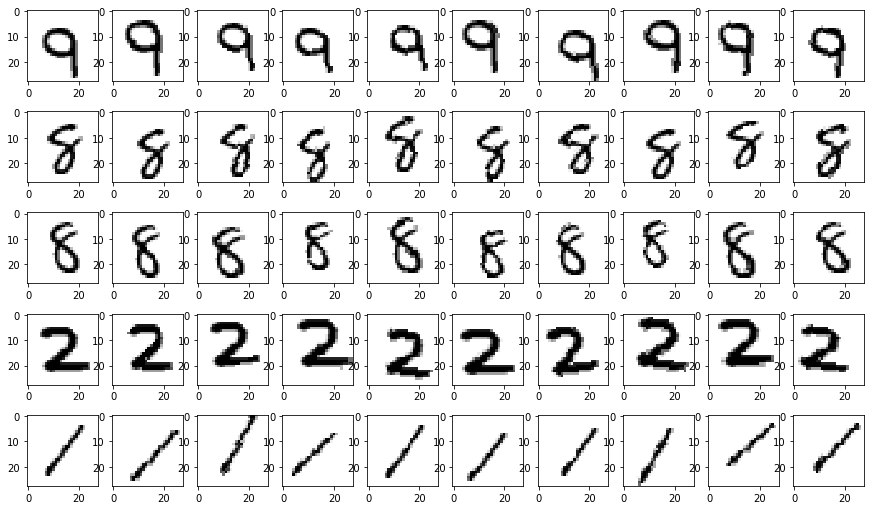

In [32]:
fig,axs = plt.subplots(5,10, figsize=(15,9))
for i in range(5):
    n = np.random.randint(0,x_mat.shape[0]-2)
    axs[i,0].imshow(x_mat[n:n+1].reshape(28,28),cmap=cm.binary)
    axs[i,1].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,2].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,3].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,4].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,5].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,6].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,7].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,8].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,9].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)

1

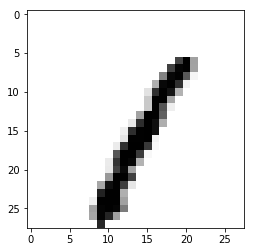

In [33]:
generate_images(x_mat[0:1])[0]
plt.imshow(generate_images(x_mat[0:2])[0].reshape(28,28), cmap=cm.binary)
y_arr[0]

In [34]:
x_gen = generate_images(x_mat)
x_gen1 = generate_images(x_mat)
x_gen2 = generate_images(x_mat)

x_gen.shape

(42000, 28, 28, 1)

In [35]:
x_all = np.concatenate((x_mat, x_gen, x_gen1, x_gen2), axis=0)
x_all.shape

(168000, 28, 28, 1)

In [36]:
print(x_gen.shape)
x_mat.shape

(42000, 28, 28, 1)


(42000, 28, 28, 1)

In [37]:
y_all = np.concatenate((y, y, y, y), axis=0)

y_all.shape

(168000,)

In [ ]:
knn = KNeighborsClassifier()

knn.fit(np.reshape(x_all, (168000, 784)), y_all)

In [ ]:
knn_pred = knn.predict(test)

sub = pd.DataFrame({'Label': knn_pred})

sub['ImageId'] = sub.index + 1

sub.head()

In [ ]:
sub.to_csv('./data/sub.csv', index=False)

## Keras


In [38]:
x_float = np.divide(x_all, 255.0)

X_train, X_test, y_train, y_test = train_test_split(x_float, y_all, test_size=.25, random_state=1001)

In [39]:
X_test.shape

(42000, 28, 28, 1)

In [40]:
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

input_shape = (28, 28, 1)
num_classes = 10
batch_size = 128
epochs = 10

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [41]:
y_train.shape

(126000, 10)

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [43]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 126000 samples, validate on 42000 samples
Epoch 1/12
126000/126000 [==============================] - 434s 3ms/step - loss: 0.4087 - acc: 0.8706 - val_loss: 0.1252 - val_acc: 0.9623
Epoch 2/12
126000/126000 [==============================] - 448s 4ms/step - loss: 0.1698 - acc: 0.9492 - val_loss: 0.0889 - val_acc: 0.9725
Epoch 3/12
126000/126000 [==============================] - 436s 3ms/step - loss: 0.1334 - acc: 0.9596 - val_loss: 0.0750 - val_acc: 0.9774
Epoch 4/12
126000/126000 [==============================] - 425s 3ms/step - loss: 0.1134 - acc: 0.9658 - val_loss: 0.0670 - val_acc: 0.9797
Epoch 5/12
126000/126000 [==============================] - 434s 3ms/step - loss: 0.1030 - acc: 0.9693 - val_loss: 0.0744 - val_acc: 0.9771
Epoch 6/12
126000/126000 [==============================] - 447s 4ms/step - loss: 0.0939 - acc: 0.9715 - val_loss: 0.0647 - val_acc: 0.9800
Epoch 7/12
126000/126000 [==============================] - 454s 4ms/step - loss: 0.0896 - acc: 0.9734 - val_

In [ ]:
test = pd.read_csv('./data/test.csv')

test = np.asmatrix(test)

test = test.iloc[:,1:].values.reshape(-1,28,28,1)

In [ ]:
preds = model.predict_classes(test)

preds